In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics, model_selection
from sklearn.neural_network import MLPClassifier




In [2]:
df = pd.read_csv('../Datos/iris.csv')
nomClases = pd.unique(df['class'])

df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Tomamos todas las columnas menos la última
X = np.array(df.iloc[:, 0:-1])
Y = np.array(df.iloc[:,-1])

le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)

# creating instance of one-hot-encoder
#enc = preprocessing.OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)
#Y = enc.fit_transform(Y.reshape(-1,1)).toarray()


In [4]:
entradas = X.shape[1]
ocultas = 2

#-- la red tendrá una salida para cada tipo de flor
salidas = len(np.unique(Y))
print("entradas = %d ; salidas = %d" % (entradas, salidas))

entradas = 4 ; salidas = 3


In [5]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
X_train, X_test, Y_train, Y_test = model_selection.train_test_split( \
        X,Y, test_size=0.30)#, random_state=42)

normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)
    

In [13]:
clf = MLPClassifier(solver='sgd', learning_rate_init=0.05,
                    hidden_layer_sizes=(2,), random_state=1,
                    max_iter=2000, 
                    verbose=False,  tol=1.0e-05,
                    activation='tanh')

history = clf.fit(X_train,Y_train)

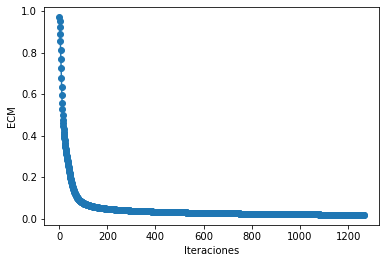

In [16]:
plt.plot(range(1, len(history.loss_curve_) + 1), history.loss_curve_, marker='o')
plt.xlabel('Iteraciones')
plt.ylabel('ECM')
plt.show()

In [8]:
Y_pred = clf.predict(X_train)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_train,Y_pred))

% aciertos X_train : 1.000


In [9]:
report = metrics.classification_report(Y_train,Y_pred)
print("Confusion matrix Training:\n%s" % report) 

Confusion matrix Training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        30

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [10]:
MM = metrics.confusion_matrix(Y_train,Y_pred)
print("Confusion matrix:\n%s" % MM)

Confusion matrix:
[[39  0  0]
 [ 0 36  0]
 [ 0  0 30]]


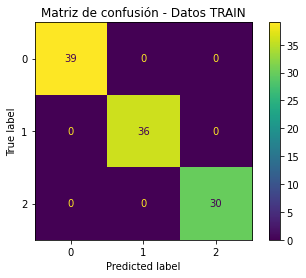

In [11]:
fig=metrics.plot_confusion_matrix(clf, X_train, Y_train) 
plt.title("Matriz de confusión - Datos TRAIN") 
plt.show()

% aciertos X_test : 0.956

Confusion matrix Test:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.90      0.95        20

       accuracy                           0.96        45
      macro avg       0.96      0.97      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[11  0  0]
 [ 0 14  0]
 [ 0  2 18]]


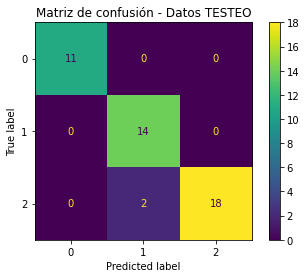

In [12]:
# -- TESTING ---
Y_pred= clf.predict(X_test)
print("%% aciertos X_test : %.3f\n" % metrics.accuracy_score(Y_test,Y_pred))

report = metrics.classification_report(le.inverse_transform(Y_test),le.inverse_transform(Y_pred))
print("Confusion matrix Test:\n%s" % report) 

MM = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix:\n%s" % MM)

fig=metrics.plot_confusion_matrix(clf, X_test, Y_test)  
plt.title("Matriz de confusión - Datos TESTEO")
plt.show()

In [15]:
history.loss_curve_

[0.9702515094179546,
 0.9498386747475435,
 0.9227112715520269,
 0.8903465704496364,
 0.8535648074354467,
 0.8129803645018396,
 0.7694215854354578,
 0.724131533141728,
 0.6787166589692392,
 0.6349048846767036,
 0.5942386176742037,
 0.5578350376037383,
 0.5262773089978096,
 0.49962437061707443,
 0.47750040802240695,
 0.45922828970965024,
 0.44397627885324126,
 0.4308921992169507,
 0.41920753941349326,
 0.40830406310118617,
 0.3977439581856089,
 0.3872697596878259,
 0.3767823939279532,
 0.3663056746446315,
 0.3559444657483608,
 0.3458422952105683,
 0.33614289845958417,
 0.32695910862132876,
 0.31835158895210086,
 0.3103189132776298,
 0.3027992914237882,
 0.2956828254288614,
 0.28883173733405826,
 0.28210474911231476,
 0.27538096021920466,
 0.2685784768101381,
 0.26166402927763666,
 0.2546519252857215,
 0.24759343525814506,
 0.24056015814977222,
 0.23362615243163692,
 0.22685326218272858,
 0.2202824521913193,
 0.21393186610807977,
 0.20780050141883916,
 0.20187528883822553,
 0.196139049999